In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call. Their website + my API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=901bbbcb85d397fde374280497d9a256'

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puri
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | adrar
Processing Record 6 of Set 1 | mackay
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | marovoay
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | andenes
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | sidi ali
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | richards bay
Processing Re

Processing Record 36 of Set 4 | marawi
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | fort-shevchenko
Processing Record 39 of Set 4 | romitan
Processing Record 40 of Set 4 | meyungs
City not found. Skipping...
Processing Record 41 of Set 4 | rensvik
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | miles city
Processing Record 44 of Set 4 | asosa
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | utrecht
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | zaysan
Processing Record 50 of Set 4 | akdepe
Processing Record 1 of Set 5 | galgani
City not found. Skipping...
Processing Record 2 of Set 5 | hohhot
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | mrirt
City not found. Skipping...
Processing Record 5 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 6 of Set 5 | krasnovishersk
Processing Record 7 of S

Processing Record 25 of Set 8 | ostrovnoy
Processing Record 26 of Set 8 | aasiaat
Processing Record 27 of Set 8 | moranbah
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | pemangkat
Processing Record 31 of Set 8 | aurangabad
Processing Record 32 of Set 8 | wuwei
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | tiarei
Processing Record 35 of Set 8 | valdivia
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | priboieni
Processing Record 39 of Set 8 | jiayuguan
Processing Record 40 of Set 8 | barao de melgaco
Processing Record 41 of Set 8 | beloha
Processing Record 42 of Set 8 | marsh harbour
Processing Record 43 of Set 8 | mocambique
City not found. Skipping...
Processing Record 44 of Set 8 | traverse city
Processing Record 45 of Set 8 | arkhipo-osipovka
Processing Record 46 of Set 8 | shahrud
Processing Record 47 of Set 8 | tabuk

Processing Record 14 of Set 12 | helong
Processing Record 15 of Set 12 | imbituba
Processing Record 16 of Set 12 | labrea
Processing Record 17 of Set 12 | mekhelta
City not found. Skipping...
Processing Record 18 of Set 12 | bondo
Processing Record 19 of Set 12 | ziarat
Processing Record 20 of Set 12 | diamantino
Processing Record 21 of Set 12 | ilulissat
Processing Record 22 of Set 12 | hun
Processing Record 23 of Set 12 | goderich
Processing Record 24 of Set 12 | alcudia
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | vichuga
Processing Record 27 of Set 12 | berkak
Processing Record 28 of Set 12 | makakilo city
Processing Record 29 of Set 12 | jumla
Processing Record 30 of Set 12 | ayan
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | ilo
Processing Record 33 of Set 12 | kendari
Processing Record 34 of Set 12 | ust-koksa
Processing Record 35 of Set 12 | skierniewice
Processing Record 36 of Set 12 | uddiawan
Processing Record 37 of Set

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puri,19.8000,85.8500,82.92,85,65,17.16,IN,2022-06-06 01:57:34
1,Rikitea,-23.1203,-134.9692,73.31,79,62,19.06,PF,2022-06-06 01:57:34
2,Puerto Ayora,-0.7393,-90.3518,71.55,96,100,7.00,EC,2022-06-06 01:57:35
3,Adrar,20.5022,-10.0711,88.93,13,97,18.05,MR,2022-06-06 01:57:35
4,Mackay,-21.1500,149.2000,78.67,68,100,2.24,AU,2022-06-06 01:57:35
5,Tasiilaq,65.6145,-37.6368,27.91,62,5,4.43,GL,2022-06-06 01:54:54
6,Marovoay,-16.1000,46.6333,71.53,65,98,5.21,MG,2022-06-06 01:57:36
7,Kaitangata,-46.2817,169.8464,56.82,64,0,5.10,NZ,2022-06-06 01:57:36
8,Airai,-8.9266,125.4092,71.82,62,100,3.60,TL,2022-06-06 01:57:36
9,Andenes,69.3143,16.1194,42.78,70,40,13.80,NO,2022-06-06 01:57:37


In [13]:
len(city_data_df)

574

In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puri,IN,2022-06-06 01:57:34,19.8000,85.8500,82.92,85,65,17.16
1,Rikitea,PF,2022-06-06 01:57:34,-23.1203,-134.9692,73.31,79,62,19.06
2,Puerto Ayora,EC,2022-06-06 01:57:35,-0.7393,-90.3518,71.55,96,100,7.00
3,Adrar,MR,2022-06-06 01:57:35,20.5022,-10.0711,88.93,13,97,18.05
4,Mackay,AU,2022-06-06 01:57:35,-21.1500,149.2000,78.67,68,100,2.24
5,Tasiilaq,GL,2022-06-06 01:54:54,65.6145,-37.6368,27.91,62,5,4.43
6,Marovoay,MG,2022-06-06 01:57:36,-16.1000,46.6333,71.53,65,98,5.21
7,Kaitangata,NZ,2022-06-06 01:57:36,-46.2817,169.8464,56.82,64,0,5.10
8,Airai,TL,2022-06-06 01:57:36,-8.9266,125.4092,71.82,62,100,3.60
9,Andenes,NO,2022-06-06 01:57:37,69.3143,16.1194,42.78,70,40,13.80


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

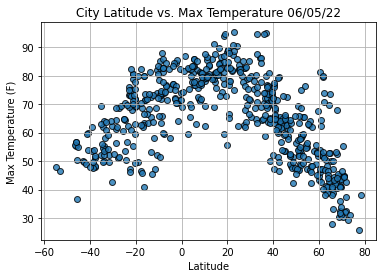

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

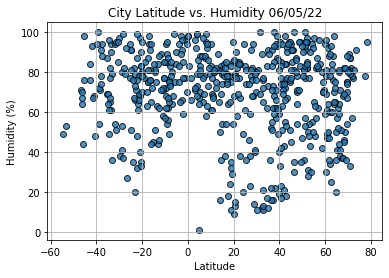

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

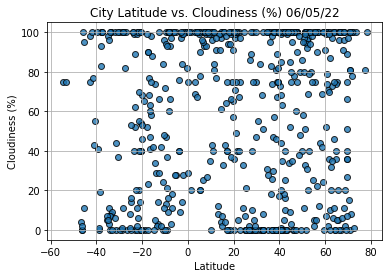

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

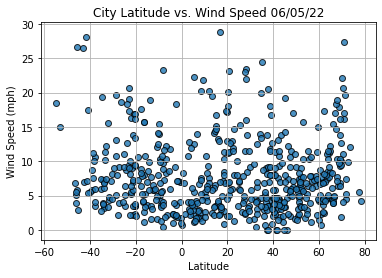

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2022-06-06 01:55:19
Lat                      -33.5906
Lng                        26.891
Max Temp                    54.18
Humidity                       90
Cloudiness                      8
Wind Speed                  11.41
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
569    False
570     True
571    False
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [25]:
# Combined
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puri,IN,2022-06-06 01:57:34,19.8000,85.8500,82.92,85,65,17.16
3,Adrar,MR,2022-06-06 01:57:35,20.5022,-10.0711,88.93,13,97,18.05
5,Tasiilaq,GL,2022-06-06 01:54:54,65.6145,-37.6368,27.91,62,5,4.43
9,Andenes,NO,2022-06-06 01:57:37,69.3143,16.1194,42.78,70,40,13.80
10,Victoria,HK,2022-06-06 01:54:26,22.2855,114.1577,87.33,85,100,11.99


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

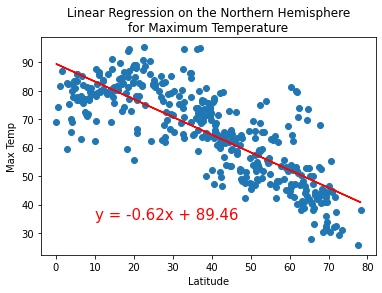

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(10,35))

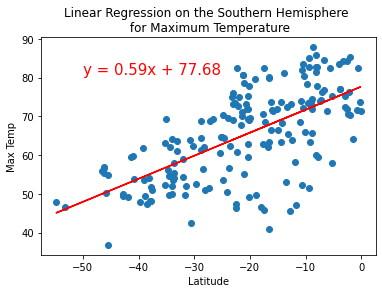

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,81))

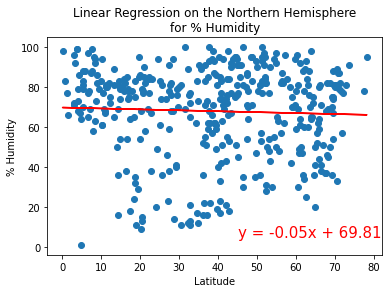

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity',
                       '% Humidity',(45,5))
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 
# for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is 
# unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots.

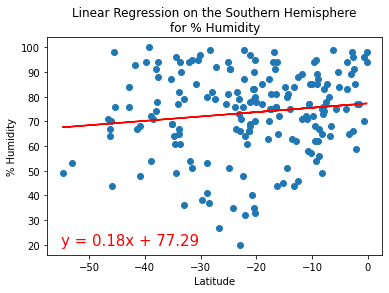

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',(-55,20))
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 
# for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is 
# unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots.

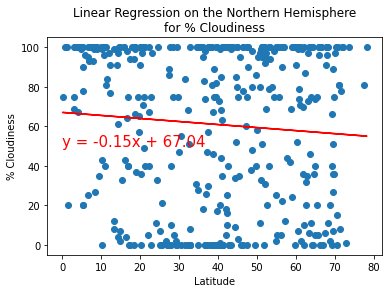

In [54]:
# Edit title, y_label, and text_coordinates and (3 places w/ "Cloudiness", title, ylabel, xvalue).
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(0,50))
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than
# –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here.
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease
# percent cloudiness. Check the r-values for your plots.

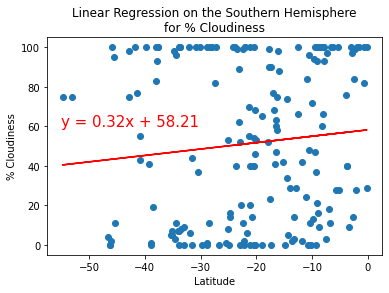

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(-55,60))
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than
# –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here.
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease
# percent cloudiness. Check the r-values for your plots.

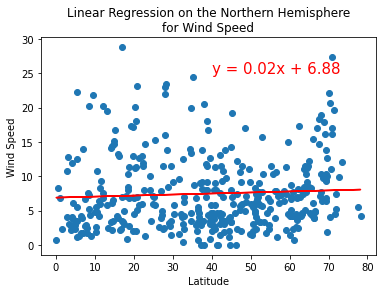

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(40,25))
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for
# the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means
# that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.
# Check the r-values for your plots.

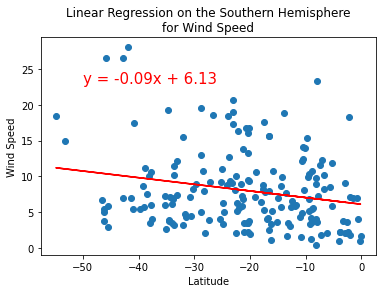

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(-50,23))
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for
# the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means
# that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.
# Check the r-values for your plots.